### This Notebook contains the details of the visualization and analyis of the poplar electronic data set'
#### Data Visualizations and Regression.

##### Import Required libraries


In [1]:
import pandas as pd
import numpy as np

from bokeh.plotting import figure, show    
from bokeh.io import output_notebook       
from bokeh.models import ColumnDataSource  # We will need this when preparing our data for a bar/column plot

import matplotlib.pyplot as plt
import seaborn as sns


output_notebook()  

Loading BokehJS ...

In [2]:
df = pd.read_csv(r'Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
#View columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

##### We can see that the different data types represented in the data set and also the count of items in each column.  We can also see that the columns do not have the same count, which indicates that some of them have null values. Lets examine that

In [5]:
print("Null count per column:")
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count}")

Null count per column:
VIN (1-10): 0
County: 5
City: 5
State: 0
Postal Code: 5
Model Year: 0
Make: 0
Model: 0
Electric Vehicle Type: 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 0
Electric Range: 0
Base MSRP: 0
Legislative District: 389
DOL Vehicle ID: 0
Vehicle Location: 9
Electric Utility: 5
2020 Census Tract: 5


##### Will drop nulls in the 2 major columns with the most null values. that should cater for the rest

In [6]:
df = df.dropna(subset=['Legislative District', 'Vehicle Location'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

In [7]:
## Rechecking for null values again
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count}")

VIN (1-10): 0
County: 0
City: 0
State: 0
Postal Code: 0
Model Year: 0
Make: 0
Model: 0
Electric Vehicle Type: 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 0
Electric Range: 0
Base MSRP: 0
Legislative District: 0
DOL Vehicle ID: 0
Vehicle Location: 0
Electric Utility: 0
2020 Census Tract: 0


In [8]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177473.000000,177473.000000,177473.000000,177473.000000,177473.000000,1.774730e+05,1.774730e+05
mean,98260.199332,2020.517115,58.826548,1070.609839,29.127710,2.202527e+08,5.303981e+10
std,303.694979,2.989179,91.973457,8346.920672,14.892259,7.585304e+07,1.620333e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.815241e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282691e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548504e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


#### Data Cleaning


In [9]:
#Examining columns in dataset for unique Valaues
df['State'].unique()

array(['WA'], dtype=object)

In [10]:
# Since the state column has only one value 'WA', the column is not useful. Will drop it.
df= df.drop(['State'], axis= 1)
df['County'].unique()

array(['King', 'Snohomish', 'Kitsap', 'Thurston', 'Yakima', 'Island',
       'Chelan', 'Skagit', 'Spokane', 'Walla Walla', 'Grant', 'Stevens',
       'Whitman', 'Kittitas', 'Pend Oreille', 'Clark', 'Cowlitz',
       'Jefferson', 'Clallam', 'Klickitat', 'Pierce', 'Grays Harbor',
       'Whatcom', 'Skamania', 'Wahkiakum', 'Benton', 'Franklin', 'Lewis',
       'San Juan', 'Mason', 'Okanogan', 'Douglas', 'Adams', 'Pacific',
       'Asotin', 'Columbia', 'Lincoln', 'Ferry', 'Garfield'], dtype=object)

In [11]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'Postal Code', 'Model Year', 'Make',
       'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [19]:
cols_to_check = ['Model Year', 'Make', 'Electric Vehicle Type']

# Print unique values for each column using a for loop
for column in cols_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Model Year': [2020 2023 2019 2016 2021 2017 2013 2018 2015 2022 2014 2012 2024 2011
 2000 2008 2010 2002 1998 1999 1997 2003]
Unique values in column 'Make': ['TESLA' 'FORD' 'NISSAN' 'KIA' 'BMW' 'CHEVROLET' 'AUDI' 'SMART'
 'VOLKSWAGEN' 'TOYOTA' 'RIVIAN' 'JEEP' 'HYUNDAI' 'FIAT' 'PORSCHE'
 'CHRYSLER' 'HONDA' 'MITSUBISHI' 'LEXUS' 'VOLVO' 'DODGE' 'MERCEDES-BENZ'
 'SUBARU' 'JAGUAR' 'POLESTAR' 'MINI' 'LUCID' 'LAND ROVER' 'CADILLAC'
 'ALFA ROMEO' 'FISKER' 'MAZDA' 'LINCOLN' 'GENESIS' 'TH!NK' 'GMC' 'BENTLEY'
 'AZURE DYNAMICS' 'WHEEGO ELECTRIC CARS' 'ROLLS ROYCE']
Unique values in column 'Electric Vehicle Type': ['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']


In [12]:
groups = df.groupby('Make') # Creates a grouping of the DataFrame by column 'name'
print(groups)

In [13]:
df['Base MSRP'].value_counts()

Base MSRP
0         174142
69900       1366
31950        381
52900        222
32250        136
59900        127
54950        126
39995        111
36900        104
44100         91
45600         82
64950         81
33950         76
52650         68
34995         65
36800         55
55700         54
53400         37
81100         23
110950        20
98950         19
90700         18
75095         13
102000        12
184400        10
43700         10
89100          8
109000         7
91250          5
32995          3
845000         1
Name: count, dtype: int64

The 'Electric_Range_Category' column has a range of valuees so will group based on observations.

"Unknown": If the 'Electric Range' value is 0, we assign this category as it might indicate missing or unknown values.
"Short": If the 'Electric Range' value is less than 150, we assign this category.
"Medium": If the 'Electric Range' value is between 150 and 300, we assign this category.
"Long": If the 'Electric Range' value is greater than 300, we assign this category.
By creating this new column, we can better understand the distribution of electric vehicle ranges in our dataset and account for the potential uncertainty introduced by the large number of 0 values in the 'Electric Range' column.

In [14]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')
# Display new df with Electric range category
#df['Electric_Range_category'].value_counts()
df.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
0,5YJYGDEE1L,King,Seattle,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Medium
1,7SAYGDEE9P,Snohomish,Bothell,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,Unknown
2,5YJSA1E4XK,King,Seattle,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Medium
3,5YJSA1E27G,King,Issaquah,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Medium
4,5YJYGDEE5M,Kitsap,Suquamish,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10,Unknown


In [32]:
##Creating rgroups of car makes
groups = df.groupby('Make') # Creates a grouping of the DataFrame by column 'name'
print(groups)
FORD_data = groups.get_group('FORD')
FORD_data.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
5,3FA6P0SU8H,Thurston,Yelm,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2.0,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10,Short
22,1FADP5CUXD,Yakima,Yakima,98902.0,2013,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,14.0,132294879,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10,Short
25,1FADP5CU4G,Thurston,Olympia,98501.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,101841806,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10,Short
79,1FADP5CU1D,Skagit,Anacortes,98221.0,2013,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,10.0,176052712,POINT (-122.615305 48.501275),PUGET SOUND ENERGY INC,5.305794e+10,Short
110,1FMCU0LZ9N,Whitman,Pullman,99163.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,9.0,200792707,POINT (-117.17912 46.730885),AVISTA CORP,5.307500e+10,Short


In [44]:
# Calculate count of each Car make
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256
from bokeh.palettes import Bright6

# Count the number of electric vehicles by make and get the top 10 makes
ev_counts_by_make = df['Make'].value_counts().nlargest(10)
ev_counts_by_make = ev_counts_by_make[::-1] #To ensure plots are sorted from highest to lowest

# Creating Bokeh figure
p = figure(y_range=list(ev_counts_by_make.index), height=400, width=600, title="Top 10 Electric Vehicle Makes by Number of Electric Vehicles",
           toolbar_location=None, tools="")

source = ColumnDataSource(data=dict(make=list(ev_counts_by_make.index), counts=ev_counts_by_make.values))

# Define a smaller palette with 10 colors
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting horizontal bars for each make
p.hbar(y='make', right='counts', height=0.8, source=source, line_color="white",
       fill_color=factor_cmap('make', palette=palette, factors=list(ev_counts_by_make.index)))

# Customize plot with labels
p.xaxis.axis_label = "Number of Vehicles"
p.yaxis.axis_label = "Make"

# Show the plot
show(p)

In [ ]:
# Count the number of electric vehicles by make and get the top 10 makes
ev_counts_by_make = df['Make'].value_counts().nlargest(10)

# Reverse the order of the index to display bars from highest to lowest
ev_counts_by_make = ev_counts_by_make[::-1]

# Create Bokeh figure
p = figure(y_range=list(ev_counts_by_make.index), height=400, width=600, title="Top 10 Electric Vehicle Makes by Number of Electric Vehicles",
           toolbar_location=None, tools="")

# ColumnDataSource
source = ColumnDataSource(data=dict(make=list(ev_counts_by_make.index), counts=ev_counts_by_make.values))

# Plot horizontal bars for each make
p.hbar(y='make', right='counts', height=0.8, source=source, line_color="white",
       fill_color=factor_cmap('make', palette=Viridis256, factors=list(ev_counts_by_make.index)))

# Customize plot
p.xaxis.axis_label = "Number of Vehicles"
p.yaxis.axis_label = "Make"

# Show the plot
show(p)


In [45]:
ev_counts_by_make

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

In [48]:
df.head(2)

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range_Category
0,5YJYGDEE1L,King,Seattle,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Medium
1,7SAYGDEE9P,Snohomish,Bothell,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,Unknown


NameError: name 'plt' is not defined

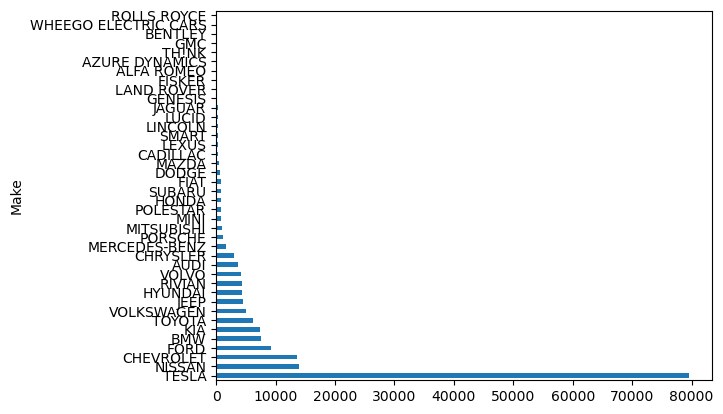

In [51]:
#df['Make'].value_counts().head(10).plot.bar()
df['Make'].value_counts().plot.barh()

plt.figure(figsize=(12,6))
#plt.barh(df['index'], bar_data['Type 1'])
plt.xlabel('Ability')
plt.ylabel('Count')
plt.title("Abilities of Pokemons")
